# Heart Disease Prediction

In [80]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
RANDOM_STATE=55


# DataSet

- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Features
- Age: age of the patient [years]  
- Sex: sex of the patient [M: Male, F: Female]  
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
- RestingBP: resting blood pressure [mm Hg]  
- Cholesterol: serum cholesterol [mm/dl]  
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
- Oldpeak: oldpeak = ST [Numeric value measured in depression]  
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing 

In [5]:
# converting the categorical variables to binary variables
c_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(data=df, prefix=c_variables, columns=c_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [100]:
Y = df["HeartDisease"].values #label
X = df.drop(columns=["HeartDisease"]).values #features or df.iloc[:,:-1]
print(f'features shape:',X.shape)
print(f'Target value shape:',Y.shape)
print(pd.Series(Y.ravel()).value_counts())

features shape: (918, 20)
Target value shape: (918,)


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [102]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,stratify=Y, random_state = RANDOM_STATE)
print(f'train samples: {len(X_train)}')
print(f'test samples: {len(X_test)}')
print(f'target proportion: {np.mean(y_train):.4f}')

train samples: 734
test samples: 184
target proportion: 0.5531


In [47]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models

### 1. Decision Tree

In [49]:
#Cross validation
from sklearn.model_selection import KFold, GridSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid={"min_samples_split":[2,10, 30, 50, 100, 200, 300, 700],
            "max_depth":[1,2, 3, 4, 8, 16, 32, 64, None]}
model1 = DecisionTreeClassifier(random_state = RANDOM_STATE)
model1_cv = GridSearchCV(model1, param_grid, cv=kf, scoring='accuracy')
model1_cv.fit(X_train_scaled,y_train)
print(model1_cv.best_params_, model1_cv.best_score_, model1_cv.best_estimator_)

{'max_depth': 4, 'min_samples_split': 2} 0.830821917808219 DecisionTreeClassifier(max_depth=4, random_state=55)


### 2. Random Forest

In [53]:
param_grid={"min_samples_split":[2,10, 30, 50, 100, 200, 300, 700],
            "max_depth":[2, 4, 8, 16, 32, 64, None],
           "n_estimators":[10,50,100,500]}
kf2 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
model2 = RandomForestClassifier(random_state = RANDOM_STATE)
model2_cv = GridSearchCV(model2, param_grid, cv=kf2, scoring='accuracy')
model2_cv.fit(X_train_scaled,y_train)
print(model2_cv.best_params_, model2_cv.best_score_, model2_cv.best_estimator_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500} 0.8665082471344702 RandomForestClassifier(max_depth=8, n_estimators=500, random_state=55)


### 3. XGBoost

In [71]:
param_grid={"max_depth":[2, 4, 6, 8],
           "n_estimators":[100,200,500],
           "learning_rate":[0.001,0.01,0.1,1]}
kf3 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
model3 = XGBClassifier(random_state = RANDOM_STATE)
model3_cv = GridSearchCV(model3, param_grid, cv=kf3, scoring='accuracy')
model3_cv.fit(X_train_scaled,y_train)
print(model3_cv.best_params_, model3_cv.best_score_, model3_cv.best_estimator_)


{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500} 0.8678967477401919 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)


# Evaluating Models

C:\Users\bahar\AppData\Local\Temp\ipykernel_24088\1399426336.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys(), patch_artist=True)


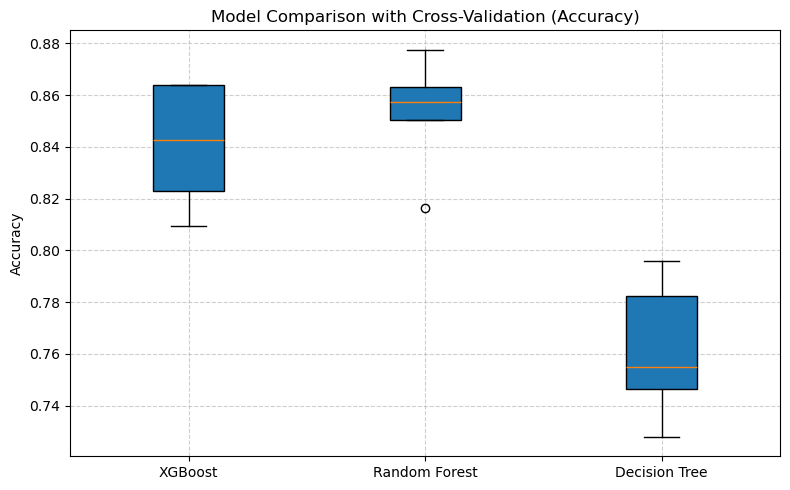

In [88]:
models = {
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Store results
results = []
names = []
kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)


for model in models.values():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    results.append(cv_scores)


plt.figure(figsize=(8, 5))
plt.boxplot(results, labels=models.keys(), patch_artist=True)
plt.title('Model Comparison with Cross-Validation (Accuracy)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Test set performance

In [113]:
models_best= {
    "XGBoost":model3_cv.best_estimator_,
    "Random Forest": model2_cv.best_estimator_,
    "Decision Tree": model1_cv.best_estimator_}

for name, model in models_best.items():
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

XGBoost Test Set Accuracy: 0.8913043478260869
Random Forest Test Set Accuracy: 0.9239130434782609
Decision Tree Test Set Accuracy: 0.875
